# K-NN  code from scratch in Python

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [19]:
dataset={'R':[[1,2],[3,4],[5,6]],'G':[[7,8],[9,10],[10,11]]} # A sample dataset 

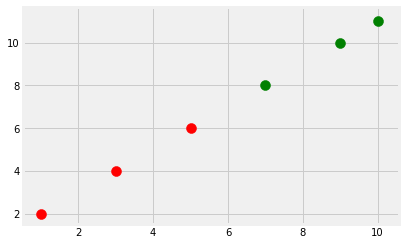

In [21]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
#we can see that we have two classes Red class and green class       

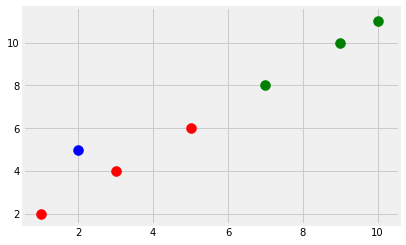

In [26]:
new_data=[2,5]
#we need to predict that in which class it will lie
#so lets plot and see
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(2,5,s=100,color='B')


In [27]:
# We can see that it lies in class Red region but we need to predict it 

In [42]:
import heapq as hq

def knearest(data,values_to_predict,k):
    distance=[]
    for i in data:
        for x in data[i]:
            dist=np.linalg.norm(np.array(x)-np.array(values_to_predict))
            distance.append([dist,i])
    a=hq.nsmallest(k,distance)
    return a[1][1]


knearest(dataset,new_data,3)

#We can see below it correctly predicts the class Red as we saw in the graph


            
        

'R'

# K-NN using Sci-kit Learn

In [54]:
from sklearn import model_selection,preprocessing,neighbors
import pandas as pd

In [49]:
pwd

'/home/royal'

In [52]:
cd /home/royal/Documents/

/home/royal/Documents


In [55]:
df=pd.read_csv('bstcancer.txt', sep=",", header=None)

In [57]:
df.columns=['id','clump_s','unif_cell_size','unif_cell_shape','marge_adhes','single_epi','bare_nuclei','bland_chrom','normal_nucleo','mitoses','class']

In [59]:
df.head()

,id,clump_s,unif_cell_size,unif_cell_shape,marge_adhes,single_epi,bare_nuclei,bland_chrom,normal_nucleo,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.drop(['id'],1,inplace=True)

In [75]:
X=np.array(df.drop(['class'],1))
Y=np.array(df['class'])
df.replace('?',-9999,inplace=True)

In [76]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [77]:
clf=neighbors.KNeighborsClassifier(n_neighbors=3)

In [78]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
clf.score(X_test,Y_test)

0.9714285714285714

In [102]:
ypred=np.array([1,2,3,4,5,6,2,7,9]).reshape(1,-1)
ypre=clf.predict(X_test)
ypre.shape
Y_test=Y_test.reshape(-1,1)

([<matplotlib.lines.Line2D at 0x7f27afd23320>],
 [<matplotlib.lines.Line2D at 0x7f27afd23860>])

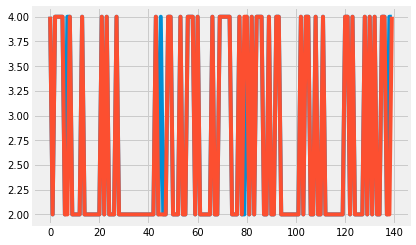

In [104]:
plt.plot(Y_test),plt.plot(ypre)

# Testing our Algorithm against a real dataset that we used in Sci-kit learn and checking if it predicts correctly

In [108]:
new_df=df.astype(float).values.tolist()

In [111]:
new_df[:5]


[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [147]:
import random
random.shuffle(new_df)
train_set={2:[],4:[]}
test_set={2:[],4:[]}
test_size=0.5

test_data=new_df[-int(test_size*len(new_df)):]
train_data=new_df[:-int(test_size*len(new_df))]


for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
for i in train_data:
    train_set[i[-1]].append(i[:-1])
correct=0
total=0
for i in test_set:
    for ii in test_set[i]:
        result=knearest(train_set,ii,5)
        if i==result:
            correct+=1
        total+=1
        
'Accuracy',correct/total      
 
# train_set

('Accuracy', 0.9656160458452722)